# MATERNAL HEALTH RISK PREDICTION USING MACHINE LEARNING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data=pd.read_csv(r"C:\Users\mathe\Desktop\Maternal Health Risk Data Set.csv")


In [5]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
#Dataframe information
print(data.info())

#Summary statistics
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
                Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count   1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      29.871795   113.198225    76.460552     8.725986    98.665089  

In [7]:
data['RiskLevel']= data['RiskLevel'].str.replace('high risk','2').str.replace('mid risk','1').str.replace('low risk','0').astype(int)


In [8]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [9]:
print(data.isnull().sum()) #to find no of null valuesin each column

# There are no missing values in the data.

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [10]:
data.describe()                                                     
# To describe set(like max,min,mean,count.....)
# the describe() function as a way to get a quick summary of your data.


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [11]:
data.shape

(1014, 7)

In [12]:
print(data.iloc[1009])


Age             22.0
SystolicBP     120.0
DiastolicBP     60.0
BS              15.0
BodyTemp        98.0
HeartRate       80.0
RiskLevel        2.0
Name: 1009, dtype: float64



## EXPLORATORY DATA ANALYSIS


In [13]:
data["RiskLevel"].value_counts()


RiskLevel
0    406
1    336
2    272
Name: count, dtype: int64

<Axes: xlabel='RiskLevel', ylabel='count'>

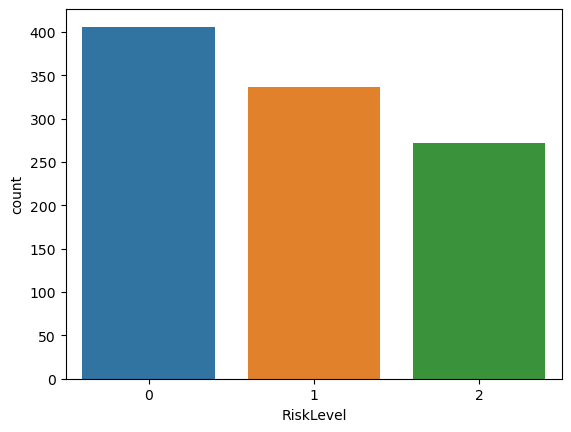

In [14]:

#distribution of different risk levels
sns.countplot(data=data, x="RiskLevel")

In [15]:
# plt.hist(data["Age"])


In [16]:
print(min(data["Age"]))

print(max(data["Age"]))

10
70


In [17]:
## Feature Binning

age_bins = [10, 20, 30, 40, 50, 60, 70, float('inf')]  
bin_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+'] 

# Create a new column 'Age Group' with bins
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=bin_labels, right=False)

new_df = data.copy(deep=False)

In [18]:
new_df.head(3)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,age_group
0,25,130,80,15.0,98.0,86,2,20-29
1,35,140,90,13.0,98.0,70,2,30-39
2,29,90,70,8.0,100.0,80,2,20-29


In [19]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,age_group
0,25,130,80,15.0,98.0,86,2,20-29
1,35,140,90,13.0,98.0,70,2,30-39
2,29,90,70,8.0,100.0,80,2,20-29
3,30,140,85,7.0,98.0,70,2,30-39
4,35,120,60,6.1,98.0,76,0,30-39
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2,20-29
1010,55,120,90,18.0,98.0,60,2,50-59
1011,35,85,60,19.0,98.0,86,2,30-39
1012,43,120,90,18.0,98.0,70,2,40-49


C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_group', ylabel='count'>

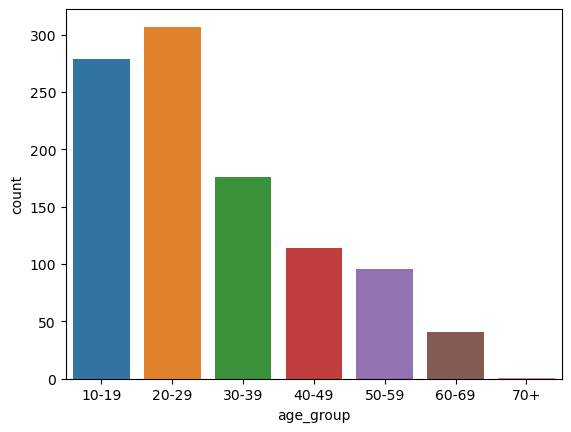

In [20]:
sns.countplot(data=new_df, x="age_group")


In [21]:
# We have the maximum records of patient who are in age group of 20-29, followed by 10-19, 30-39, 40-49, 50-59, 60-69 
# and very less records for 70+ which is obvious.

In [22]:
new=data.drop('age_group',axis=1)

In [23]:
new

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


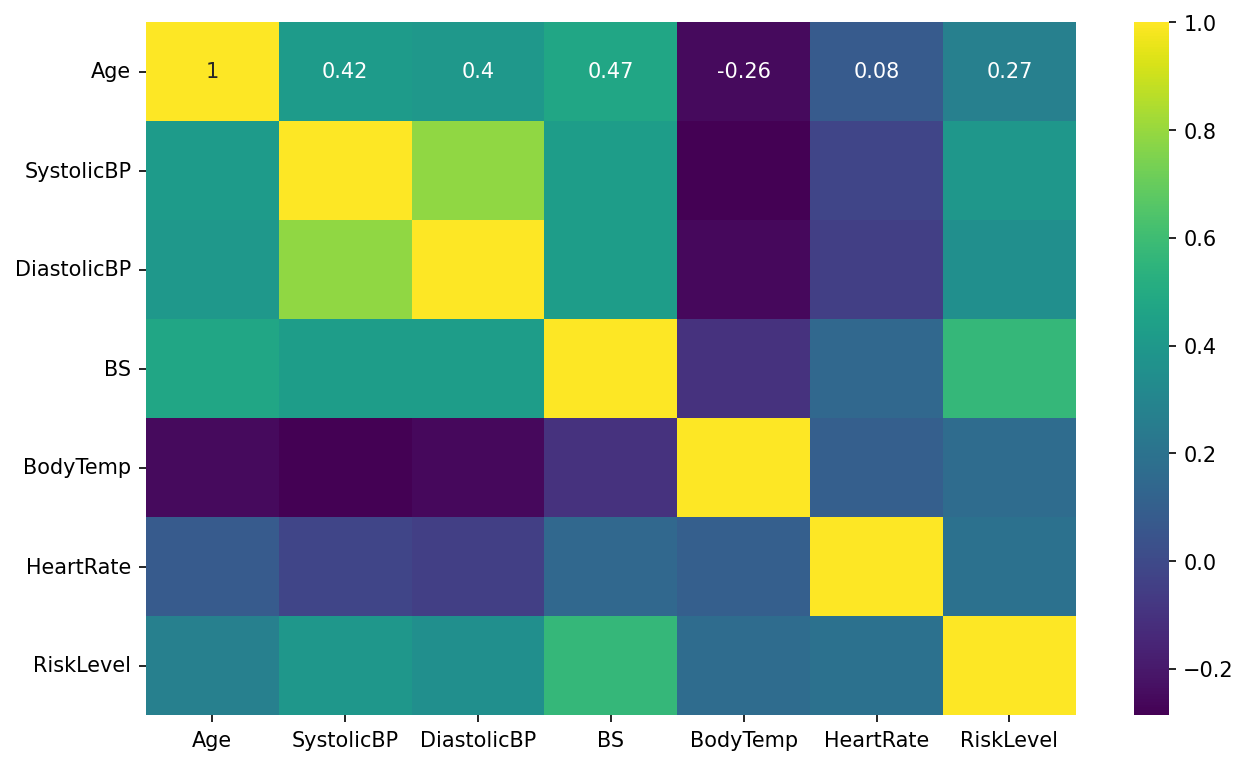

In [24]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(new.corr(), cmap='viridis', annot=True)
# plt.savefig('corr.png')
plt.show()

In [25]:
#violinplot for single variable


<Axes: xlabel='Age'>

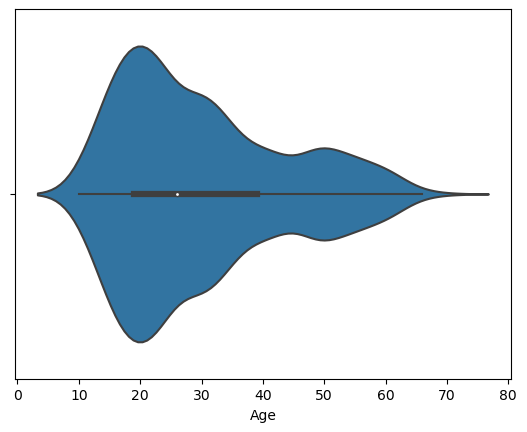

In [26]:
sns.violinplot(x=new["Age"])

<Axes: xlabel='SystolicBP'>

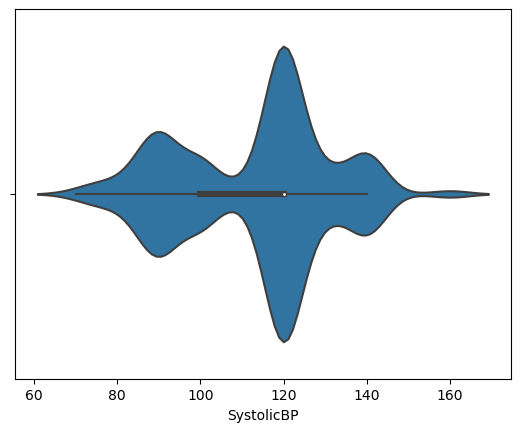

In [27]:

sns.violinplot(x=new["SystolicBP"])



<Axes: xlabel='DiastolicBP'>

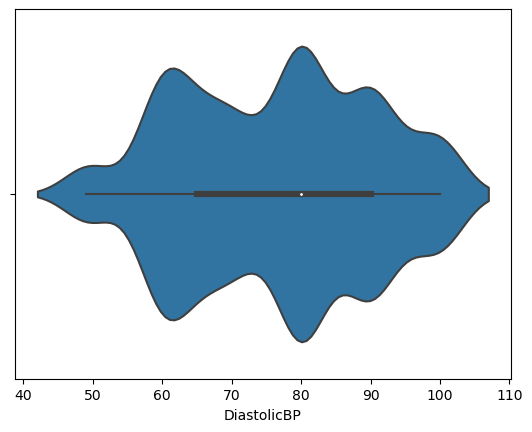

In [28]:
sns.violinplot(x=new["DiastolicBP"])


<Axes: xlabel='BS'>

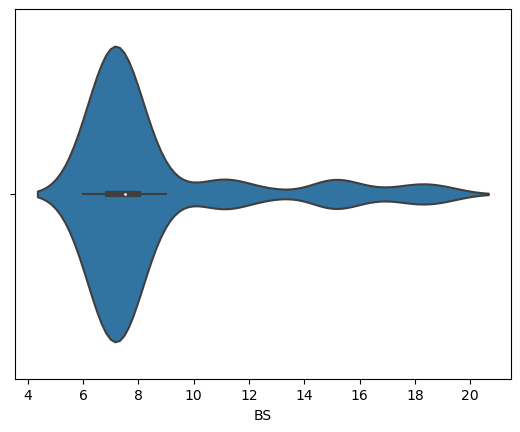

In [29]:
sns.violinplot(x=new["BS"])



<Axes: xlabel='BodyTemp'>

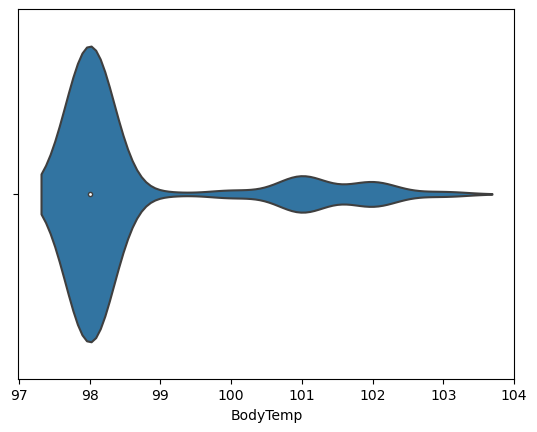

In [30]:
sns.violinplot(x=new["BodyTemp"])


<Axes: xlabel='HeartRate'>

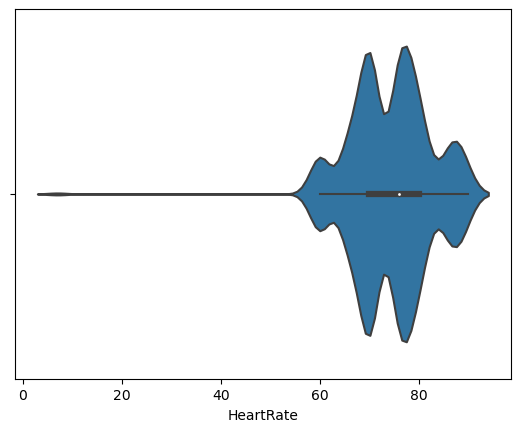

In [31]:
sns.violinplot(x=new["HeartRate"])

## Splitting the dataset into training and testing data


In [32]:


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import  StandardScaler
columns = ["Age","SystolicBP" ,"DiastolicBP", "BS", "BodyTemp", "HeartRate"]
scale_X = StandardScaler()
X = pd.DataFrame(scale_X.fit_transform(new.drop(["RiskLevel"],axis = 1),), columns = columns)
y = new["RiskLevel"]

In [33]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

## DECISION TREE CLASSIFIER

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(X_train, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search_tree.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report for the test set
print("\nClassification Report: for testing data")
print(classification_report(y_test, y_pred))


# To check accuracy of the training set
y_pred_train = best_model.predict(X_train)
print("\nClassification Report: for training data")
print(classification_report(y_train, y_pred_train))


Classification Report: for testing data
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        81
           1       0.73      0.70      0.72        67
           2       0.88      0.93      0.90        55

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.80       203
weighted avg       0.80      0.80      0.80       203


Classification Report: for training data
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       325
           1       0.88      0.88      0.88       269
           2       0.92      0.95      0.93       217

    accuracy                           0.91       811
   macro avg       0.91      0.91      0.91       811
weighted avg       0.91      0.91      0.91       811



## RANDOM FOREST CLASSIFIER


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model from the grid search
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Fit the best model to the training dataset
best_rf.fit(X_train, y_train)

# Make predictions on the testing data
y_RF_pred = best_rf.predict(X_test)


# Print the classification report
print("\nClassification Report: for testing data")
print(classification_report(y_test, y_RF_pred))

# To check accuracy of the training set
y_RF_pred_train = best_rf.predict(X_train)
print("\nClassification Report: for training data")
print(classification_report(y_train, y_RF_pred_train))




Classification Report: for testing data
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        81
           1       0.79      0.81      0.80        67
           2       0.88      0.96      0.92        55

    accuracy                           0.85       203
   macro avg       0.85      0.86      0.85       203
weighted avg       0.85      0.85      0.85       203


Classification Report: for training data
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       325
           1       0.90      0.93      0.91       269
           2       0.92      0.98      0.95       217

    accuracy                           0.93       811
   macro avg       0.93      0.94      0.93       811
weighted avg       0.93      0.93      0.93       811



## SUPPORT VECTOR MACHINE (

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [38]:
# Normalize/standardize the numerical features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred= svm.predict(X_test)

# Evaluate the model
print("\nClassification Report: for testing data")
print(classification_report(y_test,y_pred))

# To check accuracy of the training set
y_pred_train = svm.predict(X_train)
print("\nClassification Report: for training data")
print(classification_report(y_train, y_pred_train))


Classification Report: for testing data
              precision    recall  f1-score   support

           0       0.66      0.83      0.73        81
           1       0.59      0.36      0.44        67
           2       0.80      0.87      0.83        55

    accuracy                           0.68       203
   macro avg       0.68      0.69      0.67       203
weighted avg       0.67      0.68      0.67       203


Classification Report: for training data
              precision    recall  f1-score   support

           0       0.67      0.86      0.75       325
           1       0.64      0.44      0.52       269
           2       0.84      0.80      0.82       217

    accuracy                           0.71       811
   macro avg       0.72      0.70      0.70       811
weighted avg       0.71      0.71      0.69       811



## LOGISTIC REGRESSION

In [39]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # l1 only works with 'liblinear' solver
    'solver': ['liblinear']  # Required solver for l1 penalty
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report: for testing data")
print(classification_report(y_test, y_pred))

# To check accuracy of the training set
y_pred_train = best_model.predict(X_train)
print("\nClassification Report: for training data")
print(classification_report(y_train, y_pred_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.546 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.549 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.574 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.549 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.656 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.599 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.636 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.667 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.617 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.650 total time=   0.0s
[CV 2/5] END C=0.1, penalty